# Assignment-2-Fan

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
######################### checking data #######################

a = np.loadtxt('data_banknote_authentication.txt', delimiter=',')
print(a[0:10,:],"\n")
print(a[0:10,0:4])
print(a[:,-1].shape)
print(a[:,-1].sum())

[[ 3.6216   8.6661  -2.8073  -0.44699  0.     ]
 [ 4.5459   8.1674  -2.4586  -1.4621   0.     ]
 [ 3.866   -2.6383   1.9242   0.10645  0.     ]
 [ 3.4566   9.5228  -4.0112  -3.5944   0.     ]
 [ 0.32924 -4.4552   4.5718  -0.9888   0.     ]
 [ 4.3684   9.6718  -3.9606  -3.1625   0.     ]
 [ 3.5912   3.0129   0.72888  0.56421  0.     ]
 [ 2.0922  -6.81     8.4636  -0.60216  0.     ]
 [ 3.2032   5.7588  -0.75345 -0.61251  0.     ]
 [ 1.5356   9.1772  -2.2718  -0.73535  0.     ]] 

[[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]
 [ 4.3684   9.6718  -3.9606  -3.1625 ]
 [ 3.5912   3.0129   0.72888  0.56421]
 [ 2.0922  -6.81     8.4636  -0.60216]
 [ 3.2032   5.7588  -0.75345 -0.61251]
 [ 1.5356   9.1772  -2.2718  -0.73535]]
(1372,)
610.0


In [3]:
######################### Load dataset and split into X and y #######################

data = np.loadtxt('data_banknote_authentication.txt', delimiter=',')
X = data[:,0:4]
y = data[:,-1]

print(X.shape)
print('The portion of class=1:', str(round(y.sum()/len(y) * 100, 2)) + '%.')
# Rest is malignant
# The dataset is quite balanced.
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html ########### 这个dataset的用法

(1372, 4)
The portion of class=1: 44.46%.


In [4]:
######################### Convert to df and get some info#########################
df = pd.DataFrame(data, columns=['variance','skewness','kurtosis','entropy','class'])
df.head(5)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [5]:
######################### Split train & test, and normalize #########################
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)#, random_state = 17)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
######################### 定义 Performance Metrics: f2, f0.5 #########################
def f2_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 2, pos_label = 0, average = 'binary')

f2 = make_scorer(f2_scorer, greater_is_better=True)


def f1_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 1, pos_label = 0, average = 'binary')

f1 = make_scorer(f1_scorer, greater_is_better = True)

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=degree, param_range=[2 3 4 5 6 7 8 9] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=degree, param_range=[2 3 4 5 6 7 8 9] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[ 1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 25 30 35
 40 45 50 60 70 80 90] as keyword args. From version 1.0 (renaming of 0.25) passing these as pos

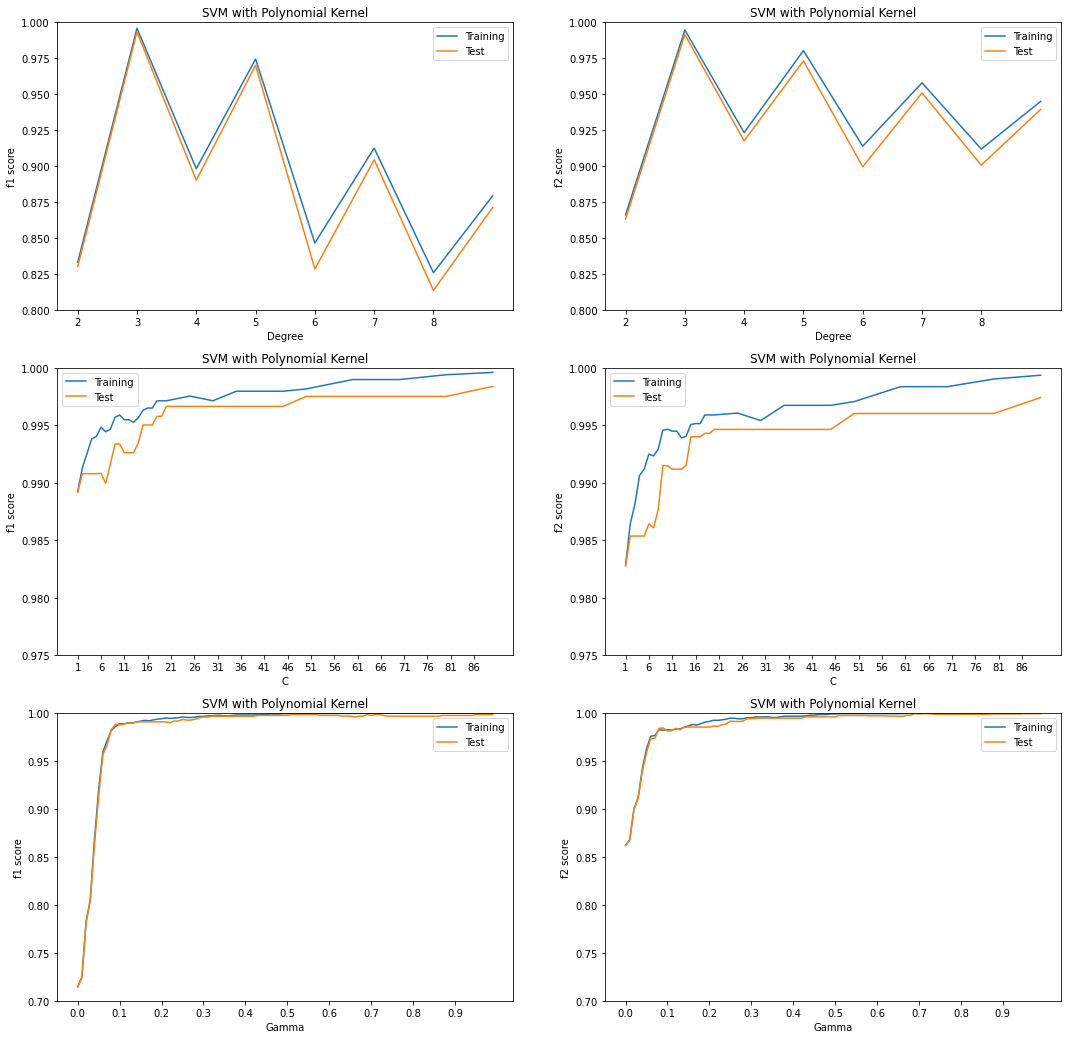

In [7]:
######################### SVM (先用SVC) with polynomial kernel 出图 #########################

def plot_poly_curve(gammas = 'auto', Cs = 10, degrees = 3, scoring = f1): #这些都是默认值
    
    num_splits = 5 ###########用于下面对df拆分
    kfold = KFold(n_splits = 5) #, random_state = 17) ###########用于cross validation
    
    
    
    
    ###################### 下面正式call Polynomial kernel #######################    
    
    ######################【1】对polynomial kernel的 degree 进行观察
    if type(degrees) == np.ndarray: 
        svm_poly = svm.SVC(kernel = 'poly', gamma = gammas, C = Cs) ########### C fixed = 1, gamma fixed = 'auto'
        num_values = len(degrees) ########### 这里取用degrees的长度
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, "degree", degrees,                                                                                cv=kfold, scoring = scoring)
        xlabel = 'Degree'
        xtick = np.arange(degrees.min(), degrees.max(), 1)
        Xs = degrees  ########### 这里取用一个degrees的 ndarray
        ylim = [0.8, 1]

    ######################【2】对polynomial的 C 进行观察
    elif type(Cs) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'poly', gamma = gammas, degree = degrees)###### degree fixed = 3, gamma fixed = 'auto'
        num_values = len(Cs) ########### 这里取用C的长度
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                      "C", Cs, cv=kfold, scoring = scoring)
        xlabel = 'C'
        xtick = np.arange(Cs.min(), Cs.max(), 5)
        Xs = Cs ########### 这里取用一个C的 ndarray
        ylim = [0.975, 1]

    ######################【3】对polynomial的 gamma 进行观察
    elif type(gammas) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'poly', degree = degrees, C = Cs) ###### C fixed = 1, degree fixed = 3
        num_values = len(gammas) ########### 这里取用 gamma 的长度
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                      "gamma", gammas, cv=kfold, scoring = scoring)
        xlabel = 'Gamma'
        xtick = np.arange(gammas.min(), gammas.max(), 0.1)
        Xs = gammas ########### 这里取用一个 gamma 的 ndarray
        ylim = [0.7, 1]
    else:
        raise TypeError


    ###################### 计算scores
    train_scores_poly = pd.DataFrame(data = train_scores,  ########### Train组的scores
                                     index = np.arange(0, num_values), 
                                     columns = np.arange(0, num_splits)) 
    valid_scores_poly = pd.DataFrame(data = valid_scores,  ########### Test组的scores
                                     index = np.arange(0, num_values), 
                                     columns = np.arange(0, num_splits)) 
    
    ###################### Plot
    plt.plot(Xs, train_scores_poly.mean(axis=1), label = 'Training')
    plt.plot(Xs, valid_scores_poly.mean(axis=1), label = 'Test')
    plt.xlabel(xlabel)
    if scoring == f2:
        plt.ylabel('f2'+ ' score')
    elif scoring == f1:
        plt.ylabel('f1'+ ' score')
    else:
        plt.ylabel('scoring')
    plt.ylim(ylim)
    plt.xticks(xtick)
    plt.title('SVM with Polynomial Kernel')
    plt.legend()

    
plt.figure(figsize = (18, 18))
degrees = np.arange(2, 10, 1) ############ 定义 degrees: choose/scan more systematically 
Cs = np.append(np.array([1]),  ############ 定义 C: choose/scan more systematically
               np.append(np.append(np.arange(1, 20, 1), # 就是1-100用三个间隔产生的array
                                   np.arange(20, 50, 5)), 
                                   np.arange(50, 100, 10)))
gammas = np.arange(0, 1, 0.01) ############ 定义 gamma: choose/scan more systematically 

plt.subplot(3, 2, 1)
plot_poly_curve(degrees = degrees)############ 探索degree
plt.subplot(3, 2, 2)
plot_poly_curve(degrees = degrees, scoring = f2)
plt.subplot(3, 2, 3)
plot_poly_curve(Cs = Cs) ############ 探索C
plt.subplot(3, 2, 4)
plot_poly_curve(Cs = Cs, scoring = f2)
plt.subplot(3, 2, 5)
plot_poly_curve(gammas = gammas) ############ 探索gamma
plt.subplot(3, 2, 6)
plot_poly_curve(gammas = gammas, scoring = f2)

plt.show()

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[ 1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 25 30 35
 40 45 50 60 70 80 90] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[ 1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 25 30 35
 40 45 50 60 70 80 90] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=gamma, param_range=[0.   0.01 0.02 0.0

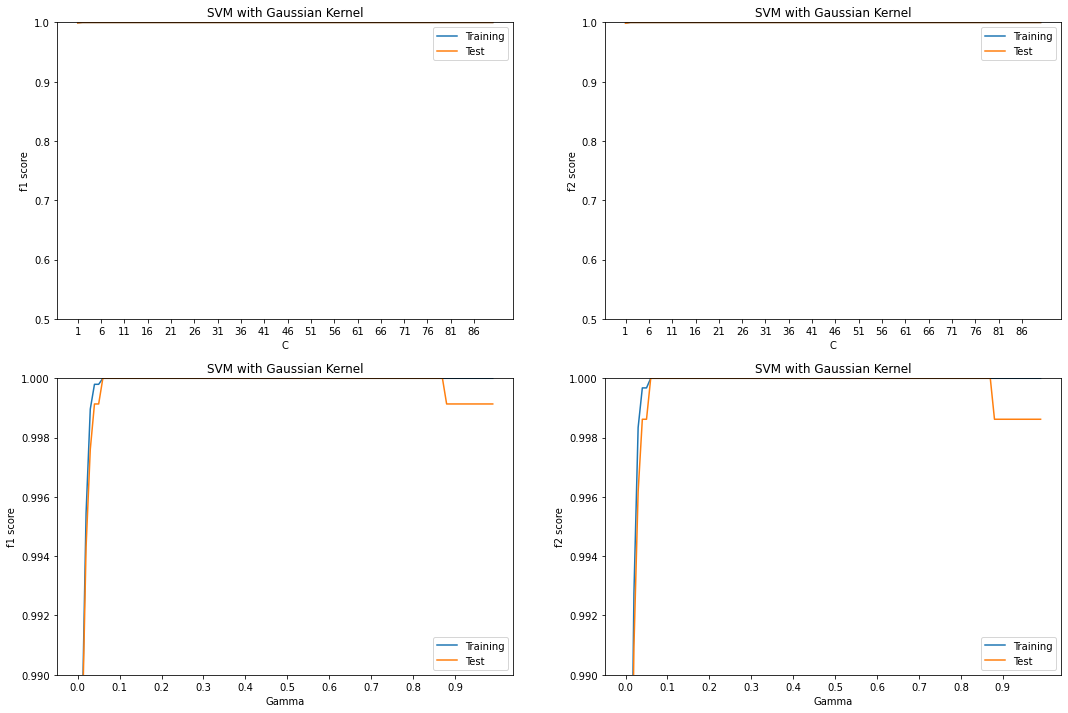

In [8]:
######################### SVM (先用SVC) with Gaussian kernel #########################
# The two functions can actually be integrated.
def plot_rbf_curve(gammas = 'auto', Cs = 10, scoring = f1): #用F2来做scoring metrics
    
    num_splits = 5 ###########用于下面对df拆分
    kfold = KFold(n_splits = 5) # ,random_state = 0) ###########用于cross validation
    
    ###################### 下面正式call Gaussian kernel #######################
    
    ######################【1】对Gaussian的 C 进行观察
    if type(Cs) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'rbf', gamma = gammas) ###### gamma fixed = 'auto'
        num_values = len(Cs) ########### 这里取用C的长度
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                      "C", Cs, cv=kfold, 
                                                      scoring = scoring)
        xlabel = 'C'
        xtick = np.arange(Cs.min(), Cs.max(), 5)
        Xs = Cs ########### 这里取用一个C的 ndarray
        ylim = [0.5, 1]

    ######################【2】对Gaussian的 gamma 进行观察
    elif type(gammas) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'rbf', C = Cs) ###### C fixed = 1
        num_values = len(gammas) ########### 这里取用 gamma 的长度
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                      "gamma", gammas, cv=kfold, 
                                                      scoring = scoring)
        xlabel = 'Gamma'
        xtick = np.arange(gammas.min(), gammas.max(), 0.1)
        Xs = gammas ########### 这里取用一个 gamma 的 ndarray
        ylim = [0.99, 1]

    else:
        raise TypeError

    ###################### 计算scores
    train_scores_poly = pd.DataFrame(data = train_scores, ########### Train组的scores
                                     index = np.arange(0, num_values), 
                                     columns = np.arange(0, num_splits)) 
    valid_scores_poly = pd.DataFrame(data = valid_scores, ########### Test组的scores
                                     index = np.arange(0, num_values), 
                                     columns = np.arange(0, num_splits)) 

    ###################### Plot
    plt.plot(Xs, train_scores_poly.mean(axis=1), label = 'Training')
    plt.plot(Xs, valid_scores_poly.mean(axis=1), label = 'Test')
    plt.xlabel(xlabel)
    if scoring == f2:
        plt.ylabel('f2'+ ' score')
    elif scoring == f1:
        plt.ylabel('f1'+ ' score')
    else:
        plt.ylabel('scoring')
    plt.ylim(ylim)
    plt.xticks(xtick)
    plt.title('SVM with Gaussian Kernel')
    plt.legend()

    
plt.figure(figsize = (18, 12))

Cs = np.append(np.array([1]),  ############ 定义 C: choose/scan more systematically
               np.append(np.append(np.arange(1, 20, 1), # 就是1-100用三个间隔产生的array
                                   np.arange(20, 50, 5)), 
                                   np.arange(50, 100, 10)))
gammas = np.arange(0, 1, 0.01) ############ 定义 gamma: choose/scan more systematically 

plt.subplot(2, 2, 1)
plot_rbf_curve(Cs = Cs)
plt.subplot(2, 2, 2)
plot_rbf_curve(Cs = Cs, scoring = f2)
plt.subplot(2, 2, 3)
plot_rbf_curve(gammas = gammas)
plt.subplot(2, 2, 4)
plot_rbf_curve(gammas = gammas, scoring = f2)

plt.show()

# Optimal hyperparameters
We use the GridSearchCV function to find the optimal hyperparameters in this part. In the Grid Search space, if gamma = 'scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma. Now training data is normalized, so gamma will be close to 1 / 30 = 0.0333 (depends on cross validation set) when gamma is defined by 'scale'. If gamma = ‘auto’, it uses 1 / n_features. Hence there is almost no difference between those two. We just use 1 / n_features and other specific values.


In [9]:
######################### GridRearch 对所有kernels #########################

start = time.time()

param_grid = {'kernel' : ['poly', 'rbf'],
              'C' : [1, 10, 50, 100, 150, 200],
              'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2],
              'degree' : [2, 3, 4, 5]}              

scoring = {'Accuracy' : 'accuracy',
           'Precision' : 'precision',  
           'recall' : 'recall',
           'f1' : 'f1', 
           'f2' : f2}

svm_svc = svm.SVC() #random_state = 0)
CV_svm = GridSearchCV(estimator = svm_svc, param_grid = param_grid, cv = 5, 
                      scoring = scoring, refit = 'f2')
CV_svm.fit(X_train, y_train)


time_spend = time.time() - start
print('time spent: ', time_spend)

y:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

In [7]:
CV_svm.cv_results_['mean_test_f1']

NameError: name 'CV_svm' is not defined

In [8]:
######################### 用results df来记录下来 Gridsearch 的结果 #########################

params_ = CV_svm.cv_results_['params']
result = {k : [dic[k] for dic in params_] for k in params_[0]}
cln = ['kernel', 'C', 'gamma', 'degree']

for i in ['Accuracy', 'Precision', 'recall', 'f1', 'f2', 'f0.5']:
    result['mean_test_' + i] = CV_svm.cv_results_['mean_test_' + i]
    result['std_test_' + i] = CV_svm.cv_results_['std_test_' + i]
    cln.append('mean_test_' + i)

results = pd.DataFrame(result)
display(results)

,C,degree,gamma,kernel,mean_test_Accuracy,std_test_Accuracy,mean_test_Precision,std_test_Precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,mean_test_f2,std_test_f2,mean_test_f0.5,std_test_f0.5
0,10,2,0.001,linear,0.991797,0.001818,0.985692,0.004897,0.995855,0.005077,0.990726,0.002074,0.990214,0.002726,0.995100,0.002705
1,10,2,0.001,poly,0.559709,0.001742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.864057,0.000831,0.613755,0.001676
2,10,2,0.001,rbf,0.979942,0.008955,0.958594,0.019181,0.997938,0.004124,0.977756,0.009707,0.972109,0.013296,0.991614,0.003738
3,10,2,0.010,linear,0.991797,0.001818,0.985692,0.004897,0.995855,0.005077,0.990726,0.002074,0.990214,0.002726,0.995100,0.002705
4,10,2,0.010,poly,0.594359,0.006983,1.000000,0.000000,0.078673,0.016742,0.145421,0.028902,0.873407,0.001881,0.633020,0.003935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,100,5,0.100,poly,0.876920,0.025247,0.982066,0.017291,0.734901,0.067011,0.838390,0.041576,0.951152,0.006772,0.855109,0.027927
188,100,5,0.100,rbf,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
189,100,5,1.000,linear,0.989971,0.003422,0.985628,0.004933,0.991688,0.007789,0.988622,0.003941,0.989571,0.003014,0.992513,0.004631
190,100,5,1.000,poly,0.995446,0.002875,0.995897,0.005025,0.993793,0.005068,0.994829,0.003260,0.996411,0.003166,0.995459,0.003138


In [10]:
######################### 对各参数列做处理 #########################

results.loc[results.kernel == 'linear', ['degree', 'gamma']] = np.nan #####将linear kernel的这俩变NaN
results.loc[results.kernel == 'rbf', 'degree'] = np.nan #####将rbf kernel的degree变NaN
results.loc[results.kernel == 'sigmoid', 'degree'] = np.nan #####将sigmoid kernel的degree变NaN

results.drop_duplicates(inplace = True) #####删除重复的行

#########按照mean_test_f2来sort
results_sorted2 = results.sort_values('mean_test_f2', ascending = False) #####按照mean_test_f2来sort
display(results_sorted2.loc[:,cln].head(10))
#display(results_sorted2.head(10))

,kernel,C,gamma,degree,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,mean_test_f2,mean_test_f0.5
56,rbf,50,0.10,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
152,rbf,100,0.10,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
149,rbf,100,0.01,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
8,rbf,10,0.10,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
104,rbf,70,0.10,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
101,rbf,70,0.01,NaN,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
53,rbf,50,0.01,NaN,0.999091,0.997959,1.0,0.998974,0.998697,0.999673
155,rbf,100,1.00,NaN,0.999091,0.997959,1.0,0.998974,0.998697,0.999673
59,rbf,50,1.00,NaN,0.999091,0.997959,1.0,0.998974,0.998697,0.999673
11,rbf,10,1.00,NaN,0.999091,0.997959,1.0,0.998974,0.998697,0.999673


In [11]:
#########按照mean_test_f0.5来sort
results_sorted05 = results.sort_values('mean_test_f0.5', ascending = False) 
results_sorted05.drop_duplicates(subset = results_sorted05.columns[3:], inplace = True) 
  
display(results_sorted05.loc[:,cln].head(10))

,kernel,C,gamma,degree,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,mean_test_f2,mean_test_f0.5
152,rbf,100,0.100,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
155,rbf,100,1.000,NaN,0.999091,0.997959,1.000000,0.998974,0.998697,0.999673
46,poly,10,1.000,5.0,0.998182,0.997959,0.997938,0.997938,0.998372,0.998380
142,poly,70,1.000,5.0,0.995442,0.993835,0.995855,0.994829,0.995433,0.996424
190,poly,100,1.000,5.0,0.995446,0.995897,0.993793,0.994829,0.996411,0.995459
0,linear,10,NaN,NaN,0.991797,0.985692,0.995855,0.990726,0.990214,0.995100
146,rbf,100,0.001,NaN,0.984496,0.966154,1.000000,0.982730,0.977718,0.994316
144,linear,100,NaN,NaN,0.989971,0.985628,0.991688,0.988622,0.989571,0.992513
22,poly,10,1.000,3.0,0.994525,1.000000,0.987521,0.993616,0.998062,0.992408
70,poly,50,1.000,3.0,0.993616,0.997959,0.987521,0.992590,0.996759,0.992081


In [27]:
######################### GridRearch 仅对 Gaussian #########################

start = time.time()

C2 = np.append(np.array([0.5]), 
               np.append(np.append(np.arange(0, 10, 0.1), 
                                   np.arange(10, 50, 5)), 
                                   np.arange(50, 101, 10)))

param_grid2 = {'C' : C2,
               'gamma' : np.append(np.arange(0.01, 2, 0.02), 1/X_train.shape[1])}   

svm_2 = svm.SVC(kernel = 'rbf', random_state = 0)
CV_svm2 = GridSearchCV(estimator = svm_2, param_grid = param_grid2, cv = 5, 
                       scoring = scoring, refit = 'f2')
CV_svm2.fit(X_train, y_train)

time_spend = time.time() - start
print('time spent: ', time_spend)

Error: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("E

In [32]:
######################### 用results df来记录下来 Gridsearch 的结果 #########################
params_2 = CV_svm2.cv_results_['params']
result2 = {k : [dic[k] for dic in params_2] for k in params_2[0]}

for i in ['Accuracy', 'Precision', 'recall', 'f1', 'f2', 'f0.5']:
    result2['mean_test_' + i] = CV_svm2.cv_results_['mean_test_' + i]
    result2['std_test_' + i] = CV_svm2.cv_results_['std_test_' + i]

results2 = pd.DataFrame(result2)
results2.loc[:, 'kernel'] = 'rbf'
results_all = results.append(results2, ignore_index = True)
display(results_all)

,C,degree,gamma,kernel,mean_test_Accuracy,std_test_Accuracy,mean_test_Precision,std_test_Precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,mean_test_f2,std_test_f2,mean_test_f0.5,std_test_f0.5
0,10.0,NaN,NaN,linear,0.991797,0.001818,0.985692,0.004897,0.995855,0.005077,0.990726,0.002074,0.990214,0.002726,0.995100,0.002705
1,10.0,2.0,0.001,poly,0.559709,0.001742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.864057,0.000831,0.613755,0.001676
2,10.0,NaN,0.001,rbf,0.979942,0.008955,0.958594,0.019181,0.997938,0.004124,0.977756,0.009707,0.972109,0.013296,0.991614,0.003738
3,10.0,2.0,0.010,poly,0.594359,0.006983,1.000000,0.000000,0.078673,0.016742,0.145421,0.028902,0.873407,0.001881,0.633020,0.003935
4,10.0,NaN,0.010,rbf,0.984496,0.006845,0.966154,0.014483,1.000000,0.000000,0.982730,0.007533,0.977718,0.009841,0.994316,0.002559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,100.0,NaN,1.930,rbf,0.999091,0.001818,0.997959,0.004082,1.000000,0.000000,0.998974,0.002051,0.998697,0.002606,0.999673,0.000655
11695,100.0,NaN,1.950,rbf,0.999091,0.001818,0.997959,0.004082,1.000000,0.000000,0.998974,0.002051,0.998697,0.002606,0.999673,0.000655
11696,100.0,NaN,1.970,rbf,0.999091,0.001818,0.997959,0.004082,1.000000,0.000000,0.998974,0.002051,0.998697,0.002606,0.999673,0.000655
11697,100.0,NaN,1.990,rbf,0.999091,0.001818,0.997959,0.004082,1.000000,0.000000,0.998974,0.002051,0.998697,0.002606,0.999673,0.000655


In [30]:
######################### 对各参数列做处理 ######################### ???????????????
# Sort all results:
results_all_sorted2 = results_all.sort_values('mean_test_f2', ascending = False)
results_all_sorted2.index = range(len(results_all_sorted2))
results_all_sorted05 = results_all.sort_values('mean_test_f0.5', ascending = False)
results_all_sorted05.index = range(len(results_all_sorted05))
display(results_all_sorted2.head())
#display(results_all_sorted05.head())

,C,degree,gamma,kernel,mean_test_Accuracy,std_test_Accuracy,mean_test_Precision,std_test_Precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,mean_test_f2,std_test_f2,mean_test_f0.5,std_test_f0.5
0,100.0,NaN,0.25,rbf,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.0,NaN,0.57,rbf,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.1,NaN,0.11,rbf,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.1,NaN,0.09,rbf,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,NaN,0.25,rbf,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [34]:
#########按照mean_test_f0.5来sort ????????????????
results_sorted05_2 = results_all.sort_values('mean_test_f0.5', ascending = False) 
results_sorted05_2.drop_duplicates(subset = results_sorted05_2.columns[3:], inplace = True) 
  
display(results_sorted05.loc[:,cln].head(10))

,kernel,C,gamma,degree,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,mean_test_f2,mean_test_f0.5
152,rbf,100,0.100,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
155,rbf,100,1.000,NaN,0.999091,0.997959,1.000000,0.998974,0.998697,0.999673
46,poly,10,1.000,5.0,0.998182,0.997959,0.997938,0.997938,0.998372,0.998380
142,poly,70,1.000,5.0,0.995442,0.993835,0.995855,0.994829,0.995433,0.996424
190,poly,100,1.000,5.0,0.995446,0.995897,0.993793,0.994829,0.996411,0.995459
0,linear,10,NaN,NaN,0.991797,0.985692,0.995855,0.990726,0.990214,0.995100
146,rbf,100,0.001,NaN,0.984496,0.966154,1.000000,0.982730,0.977718,0.994316
144,linear,100,NaN,NaN,0.989971,0.985628,0.991688,0.988622,0.989571,0.992513
22,poly,10,1.000,3.0,0.994525,1.000000,0.987521,0.993616,0.998062,0.992408
70,poly,50,1.000,3.0,0.993616,0.997959,0.987521,0.992590,0.996759,0.992081


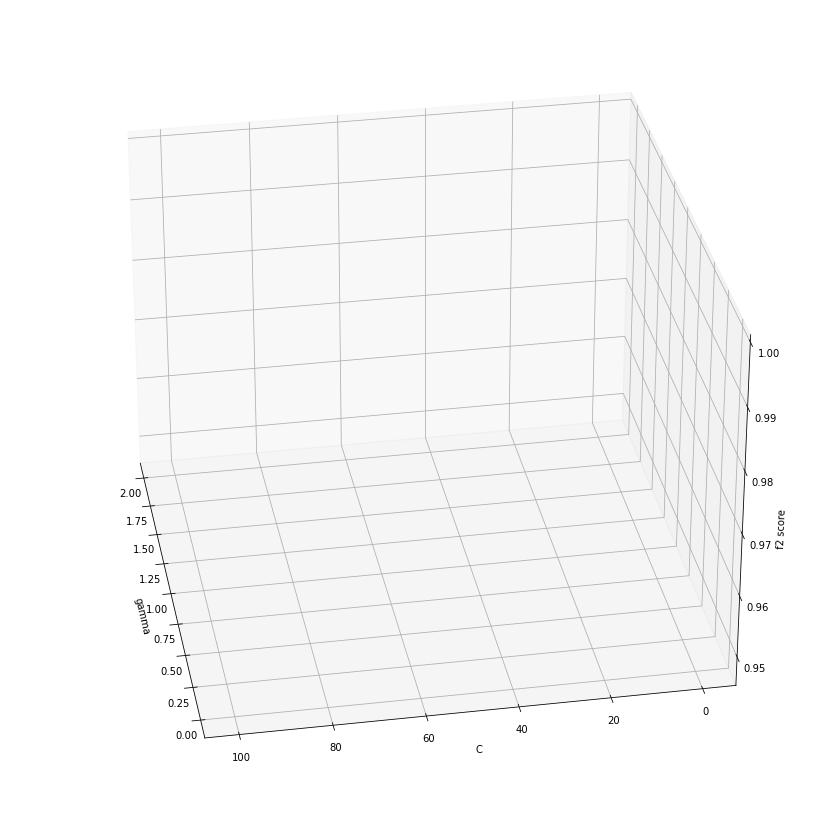

In [31]:
######################### 3D来同时看三个参数的图 #########################

# Plot the surface for f2 score
plt.figure(figsize = (15, 15))
ax = plt.axes(projection='3d')
ax.plot_trisurf(results2.gamma, results2.C, results2.mean_test_f2, 
                cmap = cm.coolwarm, alpha = 0.75)
ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax.set_zlabel('f2 score')
ax.view_init(azim=-190) #Rotation
plt.show()